Source for Midi Conversion functions: https://github.com/kstar/markov-music

In [1]:
# Update midi package
!pip install git+https://github.com/vishnubob/python-midi@feature/python3
!git clone -b feature/python3 https://github.com/vishnubob/python-midi.git
!pip install --upgrade git+https://github.com/louisabraham/python3-midi

  Cloning https://github.com/vishnubob/python-midi (to revision feature/python3) to /private/var/folders/60/9hjj_5fj7_q5kgnc6ppg7_wc0000gn/T/pip-req-build-1bjpl6ty
  Running command git clone -q https://github.com/vishnubob/python-midi /private/var/folders/60/9hjj_5fj7_q5kgnc6ppg7_wc0000gn/T/pip-req-build-1bjpl6ty
  Running command git checkout -b feature/python3 --track origin/feature/python3
  Switched to a new branch 'feature/python3'
  Branch 'feature/python3' set up to track remote branch 'feature/python3' from 'origin'.
  Created wheel for midi: filename=midi-0.2.3-py3-none-any.whl size=9666 sha256=7fa04756b2b4ab8ab8e22c63030ea52792c99f5c8c838cd074573cc576570409
  Stored in directory: /private/var/folders/60/9hjj_5fj7_q5kgnc6ppg7_wc0000gn/T/pip-ephem-wheel-cache-ro15dgl9/wheels/1a/c5/f7/414f20cd34d786c2af030164220e2dae9a9760d90d4e58a5a4
Successfully built midi
fatal: destination path 'python-midi' already exists and is not an empty directory.
  Cloning https://github.com/louisabr

In [2]:
# !python python-midi/setup.py install

# Preprocessing

In [3]:
import mido # https://github.com/mido/mido
import midi # https://github.com/vishnubob/python-midi
import random
import numpy as np
import scipy as sp
from scipy.sparse import lil_matrix
from collections import defaultdict, Counter
from sys import getsizeof
import itertools
import statistics as stats
import math

In [4]:
# Look at the file
! mididump.py midi/bwv1041a.mid

midi.Pattern(format=1, resolution=384, tracks=\
[midi.Track(\
  [midi.TrackNameEvent(tick=0, text='untitled', data=[117, 110, 116, 105, 116, 108, 101, 100]),
   midi.SmpteOffsetEvent(tick=0, data=[96, 0, 3, 0, 0]),
   midi.TimeSignatureEvent(tick=0, data=[2, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[0, 0]),
   midi.SetTempoEvent(tick=0, data=[9, 216, 41]),
   midi.EndOfTrackEvent(tick=0, data=[])]),
 midi.Track(\
  [midi.PortEvent(tick=0, data=[0]),
   midi.TrackNameEvent(tick=0, text='Solo Violin', data=[83, 111, 108, 111, 32, 86, 105, 111, 108, 105, 110]),
   midi.ProgramChangeEvent(tick=0, channel=0, data=[40]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[7, 115]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[10, 64]),
   midi.NoteOnEvent(tick=576, channel=0, data=[76, 100]),
   midi.NoteOnEvent(tick=192, channel=0, data=[76, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[81, 100]),
   midi.NoteOnEvent(tick=384, channel=0, data=[81, 0]),
   midi.NoteOnEve

   midi.NoteOnEvent(tick=0, channel=2, data=[64, 100]),
   midi.NoteOnEvent(tick=384, channel=2, data=[64, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[63, 100]),
   midi.NoteOnEvent(tick=192, channel=2, data=[63, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[64, 100]),
   midi.NoteOnEvent(tick=192, channel=2, data=[64, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[72, 100]),
   midi.NoteOnEvent(tick=384, channel=2, data=[72, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[66, 100]),
   midi.NoteOnEvent(tick=192, channel=2, data=[66, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[67, 100]),
   midi.NoteOnEvent(tick=192, channel=2, data=[67, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[76, 100]),
   midi.NoteOnEvent(tick=192, channel=2, data=[76, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[76, 100]),
   midi.NoteOnEvent(tick=384, channel=2, data=[76, 0]),
   midi.NoteOnEvent(tick=0, channel=2, data=[75, 100]),
   midi.NoteOnEvent(tick=48, channel=2, data=[75

   midi.NoteOnEvent(tick=192, channel=5, data=[43, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[40, 100]),
   midi.NoteOnEvent(tick=192, channel=5, data=[40, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[43, 100]),
   midi.NoteOnEvent(tick=192, channel=5, data=[43, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[41, 100]),
   midi.NoteOnEvent(tick=192, channel=5, data=[41, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[43, 100]),
   midi.NoteOnEvent(tick=192, channel=5, data=[43, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[45, 100]),
   midi.NoteOnEvent(tick=192, channel=5, data=[45, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[41, 100]),
   midi.NoteOnEvent(tick=192, channel=5, data=[41, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[43, 100]),
   midi.NoteOnEvent(tick=96, channel=5, data=[43, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[45, 100]),
   midi.NoteOnEvent(tick=96, channel=5, data=[45, 0]),
   midi.NoteOnEvent(tick=0, channel=5, data=[47, 1

In [5]:
# https://github.com/vishnubob/python-midi
bwv = midi.read_midifile('midi/bwv1041a.mid')

In [6]:
# Iterate through to look at contents
for line in bwv:
    for event in line:
        print(event)

midi.TrackNameEvent(tick=0, text='untitled', data=[117, 110, 116, 105, 116, 108, 101, 100])
midi.SmpteOffsetEvent(tick=0, data=[96, 0, 3, 0, 0])
midi.TimeSignatureEvent(tick=0, data=[2, 2, 24, 8])
midi.KeySignatureEvent(tick=0, data=[0, 0])
midi.SetTempoEvent(tick=0, data=[9, 216, 41])
midi.EndOfTrackEvent(tick=0, data=[])
midi.PortEvent(tick=0, data=[0])
midi.TrackNameEvent(tick=0, text='Solo Violin', data=[83, 111, 108, 111, 32, 86, 105, 111, 108, 105, 110])
midi.ProgramChangeEvent(tick=0, channel=0, data=[40])
midi.ControlChangeEvent(tick=0, channel=0, data=[7, 115])
midi.ControlChangeEvent(tick=0, channel=0, data=[10, 64])
midi.NoteOnEvent(tick=576, channel=0, data=[76, 100])
midi.NoteOnEvent(tick=192, channel=0, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[81, 100])
midi.NoteOnEvent(tick=384, channel=0, data=[81, 0])
midi.NoteOnEvent(tick=192, channel=0, data=[76, 100])
midi.NoteOnEvent(tick=192, channel=0, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[77, 100

midi.NoteOnEvent(tick=96, channel=0, data=[68, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[66, 100])
midi.NoteOnEvent(tick=96, channel=0, data=[66, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[68, 100])
midi.NoteOnEvent(tick=192, channel=0, data=[68, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[77, 100])
midi.NoteOnEvent(tick=192, channel=0, data=[77, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[76, 100])
midi.NoteOnEvent(tick=192, channel=0, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[81, 100])
midi.NoteOnEvent(tick=192, channel=0, data=[81, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[84, 100])
midi.NoteOnEvent(tick=384, channel=0, data=[84, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[83, 100])
midi.NoteOnEvent(tick=48, channel=0, data=[83, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[84, 100])
midi.NoteOnEvent(tick=48, channel=0, data=[84, 0])
midi.NoteOnEvent(tick=0, channel=0, data=[83, 100])
midi.NoteOnEvent(tick=48, channel=0, data=[83, 0])
midi.NoteOnEvent(

midi.NoteOnEvent(tick=0, channel=2, data=[67, 100])
midi.NoteOnEvent(tick=192, channel=2, data=[67, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[76, 100])
midi.NoteOnEvent(tick=192, channel=2, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[76, 100])
midi.NoteOnEvent(tick=384, channel=2, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[75, 100])
midi.NoteOnEvent(tick=48, channel=2, data=[75, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[76, 100])
midi.NoteOnEvent(tick=48, channel=2, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[75, 100])
midi.NoteOnEvent(tick=48, channel=2, data=[75, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[76, 100])
midi.NoteOnEvent(tick=48, channel=2, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[75, 100])
midi.NoteOnEvent(tick=48, channel=2, data=[75, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[76, 100])
midi.NoteOnEvent(tick=48, channel=2, data=[76, 0])
midi.NoteOnEvent(tick=0, channel=2, data=[75, 100])
midi.NoteOnEvent(t

midi.NoteOnEvent(tick=0, channel=3, data=[55, 100])
midi.NoteOnEvent(tick=384, channel=3, data=[55, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[57, 100])
midi.NoteOnEvent(tick=384, channel=3, data=[57, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[59, 100])
midi.NoteOnEvent(tick=384, channel=3, data=[59, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[60, 100])
midi.NoteOnEvent(tick=1152, channel=3, data=[60, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[58, 100])
midi.NoteOnEvent(tick=384, channel=3, data=[58, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[60, 100])
midi.NoteOnEvent(tick=384, channel=3, data=[60, 0])
midi.NoteOnEvent(tick=2112, channel=3, data=[65, 100])
midi.NoteOnEvent(tick=192, channel=3, data=[65, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[62, 100])
midi.NoteOnEvent(tick=384, channel=3, data=[62, 0])
midi.NoteOnEvent(tick=192, channel=3, data=[62, 100])
midi.NoteOnEvent(tick=192, channel=3, data=[62, 0])
midi.NoteOnEvent(tick=0, channel=3, data=[64, 100])
midi.N

midi.NoteOnEvent(tick=0, channel=4, data=[47, 100])
midi.NoteOnEvent(tick=192, channel=4, data=[47, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[52, 100])
midi.NoteOnEvent(tick=288, channel=4, data=[52, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[54, 100])
midi.NoteOnEvent(tick=48, channel=4, data=[54, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[56, 100])
midi.NoteOnEvent(tick=48, channel=4, data=[56, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[57, 100])
midi.NoteOnEvent(tick=96, channel=4, data=[57, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[59, 100])
midi.NoteOnEvent(tick=96, channel=4, data=[59, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[60, 100])
midi.NoteOnEvent(tick=96, channel=4, data=[60, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[62, 100])
midi.NoteOnEvent(tick=96, channel=4, data=[62, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[64, 100])
midi.NoteOnEvent(tick=192, channel=4, data=[64, 0])
midi.NoteOnEvent(tick=0, channel=4, data=[62, 100])
midi.NoteOnEvent(t

midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[24, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[24, 0])
midi.NoteOnEvent(tick=0, channel=5, data=[36, 100])
midi.NoteOnEvent(tick=192, channel=5, data=[36, 0])
midi.NoteOnE

## Extract the solo in channel 1

In [7]:
# Extract the violin solo in channel 1 and save it

# Instantiate a MIDI Pattern (contains a list of tracks)
pattern = midi.Pattern()
# Append the track to the pattern
pattern.append(bwv[0]) # info on tempo
pattern.append(bwv[1])
print(pattern)
# Save the pattern to disk
midi.write_midifile("bwv1041a_solo.mid", pattern)

midi.Pattern(format=1, resolution=220, tracks=\
[midi.Track(\
  [midi.TrackNameEvent(tick=0, text='untitled', data=[117, 110, 116, 105, 116, 108, 101, 100]),
   midi.SmpteOffsetEvent(tick=0, data=[96, 0, 3, 0, 0]),
   midi.TimeSignatureEvent(tick=0, data=[2, 2, 24, 8]),
   midi.KeySignatureEvent(tick=0, data=[0, 0]),
   midi.SetTempoEvent(tick=0, data=[9, 216, 41]),
   midi.EndOfTrackEvent(tick=0, data=[])]),
 midi.Track(\
  [midi.PortEvent(tick=0, data=[0]),
   midi.TrackNameEvent(tick=0, text='Solo Violin', data=[83, 111, 108, 111, 32, 86, 105, 111, 108, 105, 110]),
   midi.ProgramChangeEvent(tick=0, channel=0, data=[40]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[7, 115]),
   midi.ControlChangeEvent(tick=0, channel=0, data=[10, 64]),
   midi.NoteOnEvent(tick=576, channel=0, data=[76, 100]),
   midi.NoteOnEvent(tick=192, channel=0, data=[76, 0]),
   midi.NoteOnEvent(tick=0, channel=0, data=[81, 100]),
   midi.NoteOnEvent(tick=384, channel=0, data=[81, 0]),
   midi.NoteOnEve

# MIDI TO UNIGRAM FUNCTION

In [8]:
def midi_to_unigram(FILE_NAME, BASE_TICK, LOWEST_NOTE):
    """
    Converts input MIDI file given the base tick and lowest note in the file into unigrams.
    """
    # Initializations
    current_state = 0;

    # Open the MIDI file
    pattern = midi.read_midifile( FILE_NAME );
    
    # Initialize list to store unigrams
    current_states = []

    # Read the file for note on and off events
    for line in pattern:
        for event in line:
            if type(event) == midi.events.NoteOffEvent or type(event) == midi.events.NoteOnEvent:

                # Write the state enough number of times
                for x in range(0, int( round( float(event.tick) / float(BASE_TICK) ) ) ):
                    current_states.append(current_state)
                
                if type(event) == midi.events.NoteOffEvent or event.get_velocity() <= 0:
                    if event.get_pitch() == current_state + LOWEST_NOTE - 1:
                        current_state = 0;
                else:
                    current_state = event.get_pitch() - LOWEST_NOTE + 1;
    
    return current_states

# UNIGRAMS TO N-GRAMS FUNCTION

In [9]:
def all_ngrams(vocabulary, n):
    """Returns a list of all `n`-long *tuples* of elements of the `vocabulary`.
    
    For instance,  
        >>> all_ngrams(["one", "two"], 3)
        [('one', 'one', 'one'),
         ('one', 'one', 'two'),
         ('one', 'two', 'one'),
         ('one', 'two', 'two'),
         ('two', 'one', 'one'),
         ('two', 'one', 'two'),
         ('two', 'two', 'one'),
         ('two', 'two', 'two')]
         
    Order of returned list is not specified or guaranteed.
    When `n`=0, return [()].
    """
    return list(itertools.product(vocabulary, repeat=n))

In [10]:
def ngrams(notes_list, n):
    """Returns a list of all `n`-grams in a list of `notes`."""
    return [tuple(notes_list[i : i + n])
            for i in range(0, len(notes_list) - n + 1)]

Counting $n$-grams
We conceptualize an $n$-gram as having two parts:

The context is the first $n−1$ notes in the $n$-gram.
The target is the final note in the $n$-gram.
An $n$-gram model specifies a probability for each $n$-gram type. We'll implement a model as a 2-D dictionary, indexed first by context and then by target, providing the probability for the $n$-gram.

We start by generating a similar data structure for counting up the $n$-grams in a note sequence.

In [11]:
def ngram_counts(vocabulary, notes_list, n):
    """Returns a dictionary of counts of the `n`-grams in `notes_list`.
    
    The dictionary is structured with first index by (n-1)-gram context
    and second index by the final target note.
    """
    context_dict = defaultdict(lambda: defaultdict(int))
    # zero all ngrams
    for context in all_ngrams(vocabulary, n - 1):
        for target in vocabulary:
            context_dict[context][target] = 0
    # add counts for attested ngrams
    for ngram, count in Counter(ngrams(notes_list, n)).items():
        context_dict[ngram[:-1]][ngram[-1]] = count
    return context_dict

# N-GRAM PROBABILITY MODEL ((N-1) ORDER MARKOV CHAIN) FUNCTION

In [12]:
def ngram_model(ngram_counts):
    """Returns an n-gram probability model calculated by normalizing the 
       provided `ngram-counts` dictionary
    """
    ngram_probs = defaultdict(lambda: defaultdict(float))
    for history in list(ngram_counts.keys()):
        for next_note in list(ngram_counts[history].keys()):
            try:
                ngram_probs[history][next_note] = (ngram_counts[history][next_note])/(sum(ngram_counts[history].values()))
            except:
                ngram_probs[history][next_note] = 0.0
    return ngram_probs

# FUNCTION FOR SAMPLING NOTES FROM TRANSITION MATRIX

In [13]:
def sample(model, context):
    """Returns a note sampled from the `model` assuming the `context`"""
    distribution = model[context]
    prob_remaining = random.random()
    for note, prob in sorted(distribution.items()):
        if prob_remaining < prob:
            return note
        else:
            prob_remaining -= prob
    raise ValueError

# FUNCTION FOR SAMPLING A SEQUENCE OF NOTES

In [14]:
def sample_sequence(model, start_context, count=100):
    """Returns a sequence of `count` notes sampled successively
       from the `model` *following the `start_context`*.
       The length of the returned list should be `count+len(start_context)`.
    """
    sequence = list(start_context)
    cur_context = start_context
    n = len(start_context)
    for _ in range(count):
        cur_sample = sample(model, cur_context)
        sequence.append(cur_sample)
        cur_context = () if n == 0 else list(cur_context[1:]) + [cur_sample]
        cur_context = tuple(cur_context)
    return sequence

# UNIGRAM TO MIDI FILE FUNCTION

In [15]:
def unigram_to_midi(unigrams, bpm, lowest_note, instrument, base_tick):
    """
    Takes in a list of unigrams as well as information regarding the beats per minute (BPM), the lowest note 
    in the original piece, the instrument, and the base tick.
    
    Function from https://github.com/kstar/markov-music/blob/master/unigrams-to-midi.py
    """
    BPM = bpm;
    LOWEST_NOTE = lowest_note; # Decide how much transpose
    INSTRUMENT = instrument; # Choose the instrument rendering the music
    BASE_TICK = base_tick;

    prev_unigram = 0; # No sound to start with
    tick_count = 0;

    pattern = midi.Pattern();

    track = midi.Track();
    pattern.append( track );

    set_instrument_event = midi.ProgramChangeEvent();
    set_instrument_event.set_value( INSTRUMENT );
    track.append( set_instrument_event );

    set_tempo_event = midi.SetTempoEvent();
    set_tempo_event.set_bpm( BPM );
    track.append( set_tempo_event );

    for unigram_string in unigrams:
        tick_count = tick_count + 1;
        unigram = int( unigram_string );
        if unigram != prev_unigram:
            note = unigram + ( LOWEST_NOTE - 1 );
            previous_note = prev_unigram + ( LOWEST_NOTE - 1 );

            if prev_unigram != 0: # First turn off any notes that are playing already
                event = midi.NoteOffEvent( tick = tick_count * BASE_TICK, velocity = 0, pitch = previous_note );
                track.append( event );
                tick_count = 0;

            if unigram != 0: # We have a new note, so play it
                event = midi.NoteOnEvent( tick = tick_count * BASE_TICK, velocity = 120, pitch = note );
                track.append( event );
                tick_count = 0;

        prev_unigram = unigram


    eot = midi.EndOfTrackEvent( tick = 1 );
    track.append( eot );
    
    rand_number = random.randint(50, 1000)
    new_piece_file_name = 'test_folder/composed_song_trial' + str(rand_number) + '.mid'
    
    print("New piece saved to " + new_piece_file_name)
    midi.write_midifile(new_piece_file_name, pattern );

# COMPOSITION FUNCTION

In [16]:
def compose(MIDI_FILE, n):
    """
    Function takes in a midi file (as a string) along with a value n, specifying the length of the n-grams being used
    as our states. It trains a (n-1)-order Markov model based on note transitions in the input midi file and samples
    from this created Markov chain to compose a piece of the same length as the piece in the inputted midi file. It 
    prints out the name of the file the composed piece is saved as.
    """
    # get necessary information, like lowest note, base tick, bpm
    pattern = midi.read_midifile( MIDI_FILE );
    notes_list = []
    ticks_list = [] 
    bpm_list = []
    for line in pattern:
        for event in line:
            # get instrument
            if type(event) == midi.events.ProgramChangeEvent:
                INSTRUMENT = event.get_value()
            
            # get BPM
            if type(event) == midi.events.SetTempoEvent:
                bpm_list.append(int(event.get_bpm()))

            if type(event) == midi.events.NoteOffEvent or type(event) == midi.events.NoteOnEvent:
                notes_list.append(event.get_pitch())
                ticks_list.append(event.tick)

    BPM = stats.mode(bpm_list)
    
    notes = list(set(notes_list))
    notes.sort()
    ticks = list(set(ticks_list))
    ticks.sort()
    
    # get number corresponding to lowest note in the piece
    LOWEST_NOTE = notes[0]
    
    # get lowest tick interval (interval all ticks can be evenly divided by)
    BASE_TICK = ticks[1]
    
    # midi to unigram
    current_states = midi_to_unigram(MIDI_FILE, BASE_TICK, LOWEST_NOTE)
    PIECE_LENGTH = len(current_states)
    
    vocabulary = list(set(current_states))
    gram_counts = ngram_counts(vocabulary, current_states, n)
    model = ngram_model(gram_counts)
    
    # get first nonzero element (first played note) in list of states/notes
    val = next((index for index,value in enumerate(current_states) if value != 0), None)
    
    initial_sequence = tuple(current_states[val:(val + n - 1)])
    unigrams = sample_sequence(model, initial_sequence, PIECE_LENGTH)
    
    unigram_to_midi(unigrams, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK)
    
    return current_states, unigrams

In [17]:
def create_model(MIDI_FILE, n):
    """
    Function takes in a midi file (as a string) along with a value n, specifying the length of the n-grams being used
    as our states. It trains a (n-1)-order Markov model based on note transitions in the input midi file.
    (created in addition to the compose function so we don't have to create the model numerous times to generate 
    a large number of pieces)
    """
    # get necessary information, like lowest note, base tick, bpm
    pattern = midi.read_midifile( MIDI_FILE );
    notes_list = []
    ticks_list = [] 
    bpm_list = []
    for line in pattern:
        for event in line:
            # get instrument
            if type(event) == midi.events.ProgramChangeEvent:
                INSTRUMENT = event.get_value()
            
            # get BPM
            if type(event) == midi.events.SetTempoEvent:
                bpm_list.append(int(event.get_bpm()))

            if type(event) == midi.events.NoteOffEvent or type(event) == midi.events.NoteOnEvent:
                notes_list.append(event.get_pitch())
                ticks_list.append(event.tick)

    BPM = stats.mode(bpm_list)
    
    notes = list(set(notes_list))
    notes.sort()
    ticks = list(set(ticks_list))
    ticks.sort()
    
    # get number corresponding to lowest note in the piece
    LOWEST_NOTE = notes[0]
    
    # get lowest tick interval (interval all ticks can be evenly divided by)
    BASE_TICK = ticks[1]
    
    # midi to unigram
    current_states = midi_to_unigram(MIDI_FILE, BASE_TICK, LOWEST_NOTE)
    
    vocabulary = list(set(current_states))
    gram_counts = ngram_counts(vocabulary, current_states, n)
    model = ngram_model(gram_counts)
    
    return current_states, model, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK

In [18]:
def compose_with_model(current_states, model, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK, n):
    """
    Function is identical to the second half of the compose function, uses a passed in trained model along with
    other MIDI file information to generate a composition.
    """
    PIECE_LENGTH = len(current_states)
    
    # get first nonzero element (first played note) in list of states/notes
    val = next((index for index,value in enumerate(current_states) if value != 0), None)
    
    initial_sequence = tuple(current_states[val:(val + n - 1)])
    unigrams = sample_sequence(model, initial_sequence, PIECE_LENGTH)
    
    unigram_to_midi(unigrams, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK)
    
    return unigrams

## 1st Order Markov Model + Analysis

In [19]:
# 1st order Markov Model
unigram_all_2 = []
n = 2

current_states, model, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK = create_model('bwv1041a_solo.mid', n)
for _ in range(100):
    unigrams_comp = compose_with_model(current_states, model, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK, n)
    unigram_all_2.append(unigrams_comp)

New piece saved to test_folder/composed_song_trial114.mid
New piece saved to test_folder/composed_song_trial737.mid
New piece saved to test_folder/composed_song_trial723.mid
New piece saved to test_folder/composed_song_trial866.mid
New piece saved to test_folder/composed_song_trial819.mid
New piece saved to test_folder/composed_song_trial330.mid
New piece saved to test_folder/composed_song_trial669.mid
New piece saved to test_folder/composed_song_trial801.mid
New piece saved to test_folder/composed_song_trial597.mid
New piece saved to test_folder/composed_song_trial445.mid
New piece saved to test_folder/composed_song_trial670.mid
New piece saved to test_folder/composed_song_trial337.mid
New piece saved to test_folder/composed_song_trial776.mid
New piece saved to test_folder/composed_song_trial94.mid
New piece saved to test_folder/composed_song_trial677.mid
New piece saved to test_folder/composed_song_trial912.mid
New piece saved to test_folder/composed_song_trial281.mid
New piece saved

## Autocorrelation Metrics

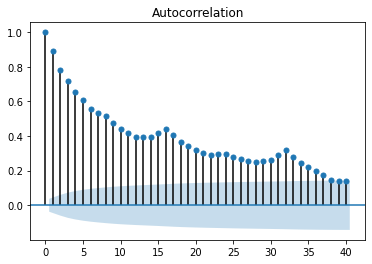

In [20]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(current_states, lags=40)
plt.show()

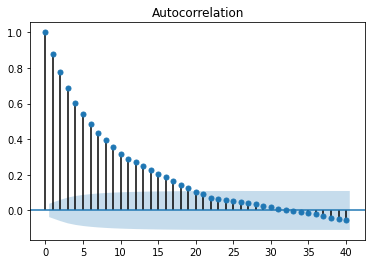

In [21]:
fig = tsaplots.plot_acf(unigram_all_2[6], lags=40)
plt.show()

## Distribution of Notes in Composed Pieces vs. Original – Bach violin concerto in A minor BWV 1041

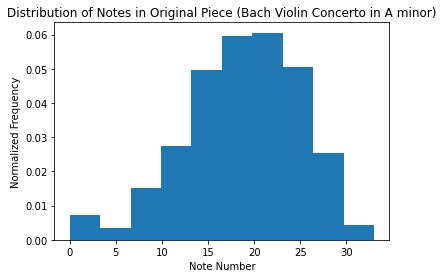

In [22]:
plt.hist(current_states, density=True)
plt.xlabel('Note Number')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Notes in Original Piece (Bach Violin Concerto in A minor)')
plt.show()

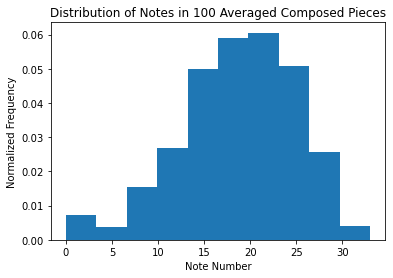

In [23]:
result2 = sum(unigram_all_2, [])
plt.hist(result2, density=True)
plt.xlabel('Note Number')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Notes in 100 Averaged Composed Pieces')
plt.show()

In [24]:
def levenshtein(a,b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n
        
    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)
            
    return current[n]

In [25]:
all_edit_distances_2 = []
for i in range(100):
    all_edit_distances_2.append(levenshtein(current_states, unigram_all_2[i]))

In [26]:
# average edit distance across 100 generated pieces
sum(all_edit_distances_2)/(len(all_edit_distances_2))

2379.79

## Consonance & Disonance

In [27]:
dict_intervals = {}
dict_intervals[0] = 'P1'
dict_intervals[1] = 'm2'
dict_intervals[2] = 'M2'
dict_intervals[3] = 'm3'
dict_intervals[4] = 'M3'
dict_intervals[5] = 'P4'
dict_intervals[6] = 'A4'
dict_intervals[7] = 'P5'
dict_intervals[8] = 'm6'
dict_intervals[9] = 'M6'
dict_intervals[10] = 'm7'
dict_intervals[11] = 'M7'
dict_intervals[12] = 'P8'

In [28]:
def abs_intervals(list_of_notes):
    abs_diff_list = []
    for x, y in zip(list_of_notes[0::], list_of_notes[1::]):
        abs_diff_list.append(12 if (abs(y-x) % 12) == 0 else (abs(y-x) % 12))
    current_intervals = [dict_intervals[item] for item in abs_diff_list]
    return current_intervals

In [29]:
def proportion_dissonance(list_of_intervals):
    """
    Returns the proportion of dissonant chords (minor second, major 2nd, augmented fourth, 
    minor 7th, major 7th) given a list of intervals
    """
    dict_intervals_counts = Counter(list_of_intervals)
    num_intervals = sum(dict_intervals_counts.values())
    dissonant_counts = dict_intervals_counts['m2'] + dict_intervals_counts['M2'] + dict_intervals_counts['A4'] + dict_intervals_counts['m7'] + dict_intervals_counts['M7']
    return dissonant_counts/num_intervals

In [30]:
def proportion_thirds(list_of_intervals):
    """
    Returns the proportion of thirds given a list of intervals
    """
    dict_intervals_counts = Counter(list_of_intervals)
    num_intervals = sum(dict_intervals_counts.values())
    thirds_counts = dict_intervals_counts['m3'] + dict_intervals_counts['M3']
    return thirds_counts/num_intervals

In [31]:
def proportion_fourths_fifths(list_of_intervals):
    """
    Returns the proportion of fourths and fifths given a list of intervals
    """
    dict_intervals_counts = Counter(list_of_intervals)
    num_intervals = sum(dict_intervals_counts.values())
    fourths_fifths_counts = dict_intervals_counts['P4'] + dict_intervals_counts['P5']
    return fourths_fifths_counts/num_intervals

In [32]:
# original piece

# proportion of dissonant intervals
original_intervals = abs_intervals(current_states)
print('Proportion of dissonant intervals:', proportion_dissonance(original_intervals))

# proportion of thirds
print('Proportion of thirds intervals:', proportion_thirds(original_intervals))

# proportion fourths & fifths
print('Proportion of fourths & fifths intervals:', proportion_fourths_fifths(original_intervals))

Proportion of dissonant intervals: 0.2544594102657444
Proportion of thirds intervals: 0.06334182744812522
Proportion of fourths & fifths intervals: 0.05424099017109574


In [33]:
# average over composed pieces
dissonant_ratios_2 = []
thirds_ratios_2 = []
fourths_fifths_ratios_2 = []

for i in range(100):
    intervals = abs_intervals(unigram_all_2[i])
    dissonant_ratios_2.append(proportion_dissonance(intervals))
    thirds_ratios_2.append(proportion_thirds(intervals))
    fourths_fifths_ratios_2.append(proportion_fourths_fifths(intervals))

In [34]:
print('Proportion of dissonant intervals:', sum(dissonant_ratios_2)/len(dissonant_ratios_2))

# proportion of thirds
print('Proportion of thirds intervals:', sum(thirds_ratios_2)/len(thirds_ratios_2))

# proportion fourths & fifths
print('Proportion of fourths & fifths intervals:', sum(fourths_fifths_ratios_2)/len(fourths_fifths_ratios_2))

Proportion of dissonant intervals: 0.2559679767103347
Proportion of thirds intervals: 0.06294395924308588
Proportion of fourths & fifths intervals: 0.054053857350800566


## 4th Order Markov Model + Analysis

In [35]:
# 4th order Markov Model
unigram_all = []
n = 5

current_states, model, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK = create_model('bwv1041a_solo.mid', n)

In [36]:
for _ in range(100):
    unigrams = compose_with_model(current_states, model, BPM, LOWEST_NOTE, INSTRUMENT, BASE_TICK, n)
    unigram_all.append(unigrams)

New piece saved to test_folder/composed_song_trial559.mid
New piece saved to test_folder/composed_song_trial213.mid
New piece saved to test_folder/composed_song_trial357.mid
New piece saved to test_folder/composed_song_trial811.mid
New piece saved to test_folder/composed_song_trial976.mid
New piece saved to test_folder/composed_song_trial804.mid
New piece saved to test_folder/composed_song_trial541.mid
New piece saved to test_folder/composed_song_trial958.mid
New piece saved to test_folder/composed_song_trial485.mid
New piece saved to test_folder/composed_song_trial960.mid
New piece saved to test_folder/composed_song_trial872.mid
New piece saved to test_folder/composed_song_trial402.mid
New piece saved to test_folder/composed_song_trial954.mid
New piece saved to test_folder/composed_song_trial430.mid
New piece saved to test_folder/composed_song_trial700.mid
New piece saved to test_folder/composed_song_trial807.mid
New piece saved to test_folder/composed_song_trial330.mid
New piece save

## Autocorrelation Metrics

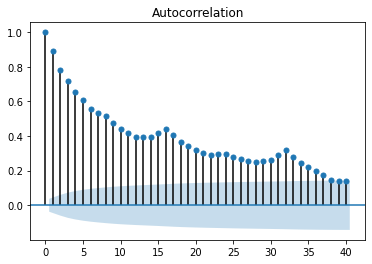

In [37]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(current_states, lags=40)
plt.show()

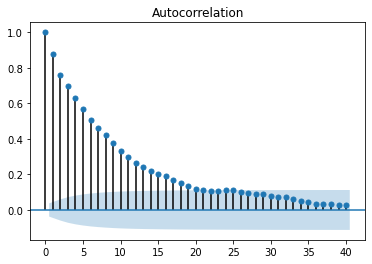

In [38]:
fig = tsaplots.plot_acf(unigram_all[1], lags=40)
plt.show()

## Distribution of Notes in Composed Pieces vs. Original – Bach violin concerto in A minor BWV 1041

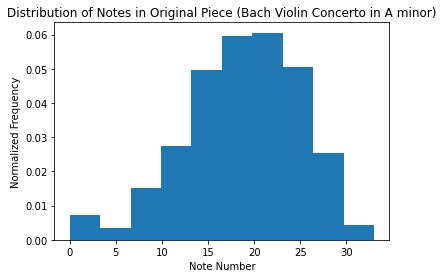

In [39]:
plt.hist(current_states, density=True)
plt.xlabel('Note Number')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Notes in Original Piece (Bach Violin Concerto in A minor)')
plt.show()

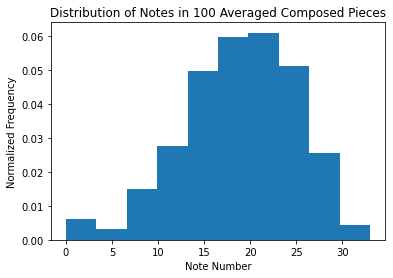

In [40]:
result = sum(unigram_all, [])
plt.hist(result, density=True)
plt.xlabel('Note Number')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Notes in 100 Averaged Composed Pieces')
plt.show()

## Levenshtein/Edit Distance (Originality)

In [41]:
def levenshtein(a,b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a,b = b,a
        n,m = m,n
        
    current = range(n+1)
    for i in range(1,m+1):
        previous, current = current, [i]+[0]*n
        for j in range(1,n+1):
            add, delete = previous[j]+1, current[j-1]+1
            change = previous[j-1]
            if a[j-1] != b[i-1]:
                change = change + 1
            current[j] = min(add, delete, change)
            
    return current[n]

In [42]:
all_edit_distances = []
for i in range(100):
    all_edit_distances.append(levenshtein(current_states, unigram_all[i]))

In [43]:
# average edit distance across 100 generated pieces
sum(all_edit_distances)/(len(all_edit_distances))

2300.1

## Consonance & Dissonance

In [44]:
# original piece

# proportion of dissonant intervals
original_intervals = abs_intervals(current_states)
print('Proportion of dissonant intervals:', proportion_dissonance(original_intervals))

# proportion of thirds
print('Proportion of thirds intervals:', proportion_thirds(original_intervals))

# proportion fourths & fifths
print('Proportion of fourths & fifths intervals:', proportion_fourths_fifths(original_intervals))


Proportion of dissonant intervals: 0.2544594102657444
Proportion of thirds intervals: 0.06334182744812522
Proportion of fourths & fifths intervals: 0.05424099017109574


In [45]:
# average over composed pieces
dissonant_ratios = []
thirds_ratios = []
fourths_fifths_ratios = []

for i in range(100):
    intervals = abs_intervals(unigram_all[i])
    dissonant_ratios.append(proportion_dissonance(intervals))
    thirds_ratios.append(proportion_thirds(intervals))
    fourths_fifths_ratios.append(proportion_fourths_fifths(intervals))

In [46]:
print('Proportion of dissonant intervals:', sum(dissonant_ratios)/len(dissonant_ratios))

# proportion of thirds
print('Proportion of thirds intervals:', sum(thirds_ratios)/len(thirds_ratios))

# proportion fourths & fifths
print('Proportion of fourths & fifths intervals:', sum(fourths_fifths_ratios)/len(fourths_fifths_ratios))

Proportion of dissonant intervals: 0.25597600872410037
Proportion of thirds intervals: 0.06373318793166119
Proportion of fourths & fifths intervals: 0.05392221010541623
